In [1]:
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)


In [2]:
csv_file = 'cuhk_embeddings/exclude_one_image_per_set_exp_results.csv'
df = pd.read_csv(csv_file)

print(df.head())
print(df.dtypes)


  similarity_metric     collection     model  top_k  accuracy
0            cosine  ViT_B_32_CUHK  ViT-B-32      1  0.247150
1            cosine  ViT_B_32_CUHK  ViT-B-32      2  0.300495
2            cosine  ViT_B_32_CUHK  ViT-B-32      5  0.364379
3            cosine  ViT_B_32_CUHK  ViT-B-32     10  0.426974
4            cosine  ViT_B_32_CUHK  ViT-B-32     15  0.461605
similarity_metric     object
collection            object
model                 object
top_k                  int64
accuracy             float64
dtype: object


In [3]:
df_ = df[df["top_k"] == 20]
grouped = df_.groupby(["similarity_metric", "model"])['accuracy'].agg(mean_accuracy=('mean'), std=('std'))
grouped = grouped.sort_values(by='mean_accuracy', ascending=False) # type: ignore
grouped

mean_accuracy  \
similarity_metric model                                                 
cosine            hf-hub:apple/DFN5B-CLIP-ViT-H-14-384       0.780394   
                  ViT-B-32                                   0.478264   
euclidean         PDNA                                       0.333599   

                                                             std  
similarity_metric model                                           
cosine            hf-hub:apple/DFN5B-CLIP-ViT-H-14-384  0.004962  
                  ViT-B-32                              0.006593  
euclidean         PDNA                                  0.004522

In [4]:
grouped = df.groupby(["similarity_metric", "model", "top_k"])['accuracy'].agg(mean_accuracy=('mean'), std=('std'))
grouped = grouped.sort_values(by=['similarity_metric', 'top_k', 'mean_accuracy'], ascending=False) # type: ignore
grouped


mean_accuracy  \
similarity_metric model                                top_k                  
euclidean         PDNA                                 50          0.407572   
                                                       40          0.388148   
                                                       30          0.365218   
                                                       25          0.350495   
                                                       20          0.333599   
                                                       15          0.313766   
                                                       10          0.287341   
                                                       5           0.246419   
                                                       2           0.197741   
                                                       1           0.166703   
cosine            hf-hub:apple/DFN5B-CLIP-ViT-H-14-384 50          0.843504   
                  ViT-B-32                             50          0.566937   
                  hf-hub:apple/DFN5B-CLIP-ViT-H-14-384 40          0.827985   
                  ViT-B-32                             40          0.545709   
                  hf-hub:apple/DFN5B-CLIP-ViT-H-14-384 30          0.807905   
                  ViT-B-32                             30          0.518354   
                  hf-hub:apple/DFN5B-CLIP-ViT-H-14-384 25          0.795816   
                  ViT-B-32                             25          0.499781   
                  hf-hub:apple/DFN5B-CLIP-ViT-H-14-384 20          0.780394   
                  ViT-B-32                             20          0.478264   
                  hf-hub:apple/DFN5B-CLIP-ViT-H-14-384 15          0.760336   
                  ViT-B-32                             15          0.450827   
                  hf-hub:apple/DFN5B-CLIP-ViT-H-14-384 10          0.733147   
                  ViT-B-32                             10          0.414995   
                  hf-hub:apple/DFN5B-CLIP-ViT-H-14-384 5           0.682405   
                  ViT-B-32                             5           0.355894   
                  hf-hub:apple/DFN5B-CLIP-ViT-H-14-384 2           0.610314   
                  ViT-B-32                             2           0.289940   
                  hf-hub:apple/DFN5B-CLIP-ViT-H-14-384 1           0.547559   
                  ViT-B-32                             1           0.239050   

                                                                   std  
similarity_metric model                                top_k            
euclidean         PDNA                                 50     0.005550  
                                                       40     0.005856  
                                                       30     0.005314  
                                                       25     0.004872  
                                                       20     0.004522  
                                                       15     0.004841  
                                                       10     0.005019  
                                                       5      0.004321  
                                                       2      0.003969  
                                                       1      0.004466  
cosine            hf-hub:apple/DFN5B-CLIP-ViT-H-14-384 50     0.004264  
                  ViT-B-32                             50     0.005025  
                  hf-hub:apple/DFN5B-CLIP-ViT-H-14-384 40     0.004350  
                  ViT-B-32                             40     0.005182  
                  hf-hub:apple/DFN5B-CLIP-ViT-H-14-384 30     0.004137  
                  ViT-B-32                             30     0.005472  
                  hf-hub:apple/DFN5B-CLIP-ViT-H-14-384 25     0.004925  
                  ViT-B-32                             25     0.006079  
                  hf-hub:apple/DFN5B-CLIP-ViT-H-14-384 20     0.004962  


                                  model  top_k  mean_accuracy       std
0  hf-hub:apple/DFN5B-CLIP-ViT-H-14-384     50       0.843504  0.004264
1                              ViT-B-32     50       0.566937  0.005025
2                                  PDNA     50       0.407572  0.005550
3  hf-hub:apple/DFN5B-CLIP-ViT-H-14-384     40       0.827985  0.004350
4                              ViT-B-32     40       0.545709  0.005182


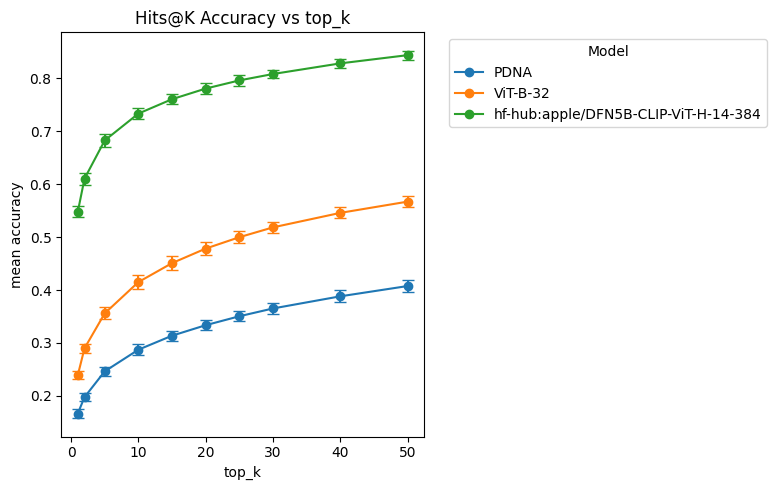

In [5]:
grouped = df.groupby([ "model", "top_k"])["accuracy"].agg(
    mean_accuracy=("mean"), std=("std")
)
grouped = grouped.sort_values(by=[ "top_k", "mean_accuracy"], ascending=False)  # type: ignore
grouped = grouped.reset_index()
print(grouped.head())
df_ = grouped

# Create the plot
fig, ax = plt.subplots(figsize=(8, 5))

# Group by model and plot each with a different color
for model, group in df_.groupby("model"):
    # Ensure the group is sorted by top_k
    group_sorted = group.sort_values("top_k")
    line, = ax.plot(group_sorted["top_k"], group_sorted["mean_accuracy"], marker='o', label=model)
    # Optionally, include error bars for std deviation:
    # ax.errorbar(
    #     group_sorted["top_k"], 
    #     group_sorted["mean_accuracy"],
    #     yerr=group_sorted["std"],
    #     fmt='none', 
    #     capsize=4, 
    #     color=ax.lines[-1].get_color()
    # )
    # Plot error bars corresponding to the 95% confidence interval
    ci = 1.96 * group_sorted["std"]
    ax.errorbar(
        group_sorted["top_k"],
        group_sorted["mean_accuracy"],
        yerr=ci,
        fmt='none',
        capsize=4,
        color=line.get_color()
    )

# Set axis labels and legend
ax.set_xlabel("top_k")
ax.set_ylabel("mean accuracy")
ax.set_title("Hits@K Accuracy vs top_k")
ax.legend(title="Model", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()